In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

## 首先实现一对多分类  
### 第一步 首先读取matlab格式的数据文件  
matlab文件中存储了两个矩阵X和y，通过loadmat函数转换为numpy的ndarray数据类型。X矩阵对应5000条数据的数据集，每条数据是一个20*20的灰度图像，用行向量的形式存储；y对应每个图像的分类结果

In [22]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X=data['X']
y=data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

### 数据文件可视化

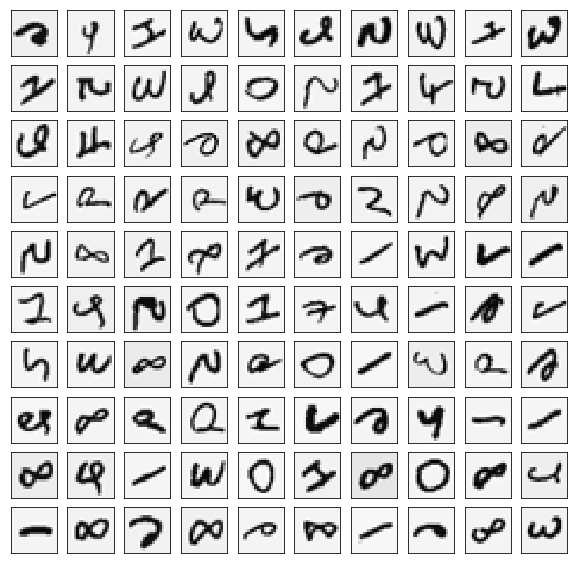

[6] [2] [4] [3] [2] [2] [5] [3] [4] [3] 

[4] [5] [3] [2] [10] [5] [4] [7] [5] [7] 

[2] [7] [2] [6] [8] [9] [5] [6] [8] [9] 

[7] [9] [9] [9] [3] [6] [4] [5] [8] [5] 

[5] [8] [4] [8] [4] [6] [1] [3] [7] [1] 

[4] [2] [5] [10] [4] [4] [2] [1] [6] [7] 

[2] [3] [8] [5] [9] [10] [1] [3] [9] [6] 

[2] [8] [9] [9] [4] [7] [6] [2] [1] [1] 

[8] [2] [1] [3] [10] [4] [8] [10] [8] [2] 

[1] [8] [6] [8] [6] [8] [1] [6] [8] [3] 



In [4]:
fig, ax = plt.subplots(10,10,figsize=(10, 10))
sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 在400的范围内生成100个随机数
sample_images = X[sample_idx, :]
sample_ys = y[sample_idx, :]
for i in range(10):
    for j in range(10):
        image = sample_images[10*i+j].reshape((20, 20))
        ax[i][j].matshow(image, cmap=plt.cm.binary)
        ax[i][j].set_xticks(np.array([]))  # just get rid of ticks
        ax[i][j].set_yticks(np.array([]))
plt.show()
for i in range(10):
    for j in range(10):
        print(sample_ys[10*i+j],end=' ')
    print('\n')
   

### 定义SIGMOID函数  
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 合起来，我们得到逻辑回归模型的假设函数： $${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [5]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )

### 定义逻辑回归的代价函数  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量

In [6]:
def ComputeCost(X,theta,y): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta)))
    return  np.sum(first - second)/len(X)


### batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$
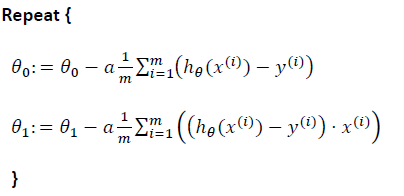  

注意：  
1) X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量  
2) 和前两个例子中的梯度下降函数的区别是用向量化的方法X.T*error，之前的例子中是用循环实现的

In [7]:
def gradientDescent(X, y, theta, alpha, iters):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta) -y
        temp = theta - X.T*error*alpha/len(X)
        theta =  temp
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

### 实现单分类器

In [8]:
X=data['X']
y=data['y']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)      #插入了第一列（全部为1）
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(X.shape[1])).T
alpha = 0.1
iters = 100

In [9]:
def train( number,X,y,theta,alpha,iters ):  #训练对应数字number的分类器
    y = y.A      #将y转换成ndarray
    y_num = np.array([1 if label == number else 0 for label in y])
    y = np.matrix(y_num).T
    final_theta,cost = gradientDescent(X, y, theta, alpha, iters)
    return final_theta
def train_all( X,y,theta,alpha,iters ):  #训练所有的分类器,返回所有分类器对应的theta，包括k行，每行为行向量形式的theta
    thetaAll = np.zeros(shape=(11,theta.shape[0]))
    for i in range(1,11):
        thetaAll[i] = train(i,X,y,theta,alpha,iters).T.A
    return np.matrix(thetaAll)
        
def predict( New,X,y,theta,alpha,iters):  #New是待分类的数据，为1*401的行向量,包括添加的第一列1，为matrix类型，返回分类结果和可能性
    prob = 0
    thetaAll = train_all( X,y,theta,alpha,iters )
    for i in range(1,11):
        prob_num = sigmoid(New*thetaAll[i].T)
        if prob_num>= prob:
            prob = prob_num
            max_num = i
    return max_num,prob


### 输出预测并为预测精度打分


In [10]:
def predictAll(X,y,theta,alpha,iters):  #返回所有数据的预测值和可能性,返回值为列表
    thetaAll = train_all( X,y,theta,alpha,iters )
    result =  sigmoid(X*thetaAll.T)
    result = result[:,1:].A   #后面10列是有用的信息
    idx = np.argmax(result, axis=1)+1 #每行最大值的下标，+1是对应的预测值
    pro = np.amax(result, axis=1)   #每行最大值
    return idx,pro
def accuracy( idx,y):  #输入值为列表类型(矩阵应该也可以)
    correct = [1 if (a == b) else 0 for (a, b) in zip(idx, y)]      #注意学习此处语法
    accuracy = sum(correct) / len(correct)
    return accuracy
   


### regularized cost（正则化代价函数）
$$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$


In [12]:
def ComputeCost_Reg(X,theta,y,numda): #X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为行向量，y为列向量
    first = np.multiply( -y, np.log(sigmoid(X*theta)))
    second = np.multiply( 1-y, np.log( 1-sigmoid(X*theta)))
    theta = theta[1:,:]    #对theta0不进行正则化
    reg = (numda / (2 * len(X))) * np.sum(np.power(theta, 2))
    return  np.sum(first - second)/len(X) + reg

### 正则化梯度函数：

梯度下降算法将分两种情形： ${{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{{0}}^{(i)}}  $

 ${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [16]:
def gradientDescent_Reg(X, y, theta, alpha, iters,numda):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta) -y
        delta = theta*alpha*numda/len(X)
        delta[0,0] = 0       #对theta0不进行正则化
        temp = theta - X.T*error*alpha/len(X) - delta
        theta =  temp
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

## 神经网络  
### 第一步 首先读取matlab格式的数据文件  
matlab文件中存储了两个矩阵Theta1和Theta2，通过loadmat函数转换为numpy的ndarray数据类型。Theta1的shape为25*401,Theta2的shape为10*26

In [21]:
data2 = loadmat('ex3weights.mat')
data2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

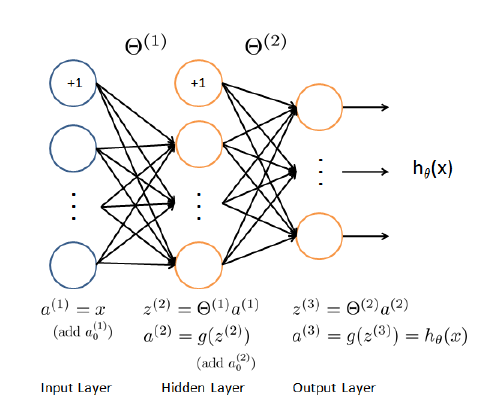

In [24]:
theta1 = data2['Theta1']
theta2 = data2['Theta2']
theta1 = np.matrix(theta1)
theta2 = np.matrix(theta2)

In [32]:
z2 = X*theta1.T
a2 = sigmoid( z2 )
a2 = a2.A
a2 = np.insert(a2, 0, values=np.ones(a2.shape[0]), axis=1)
a2 = np.matrix(a2)
z3 = a2*theta2.T
a3 = sigmoid( z3 )
result = a3.A   
idx = np.argmax(result, axis=1)+1 #每行最大值的下标，+1是对应的预测值
pro = np.amax(result, axis=1)   #每行最大值
correct = [1 if (a == b) else 0 for (a, b) in zip(idx, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
accuracy

0.9752